### 專案名稱: 第四屆機器學習百日馬拉松
### 功能描述: 第78天作業
### 版權所有: Dunk  
### 程式撰寫: Dunk  
### 撰寫日期：2020/06/09
### 改版日期:  
### 改版備註:

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

### ANS:

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
# !nvidia-smi

'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras
from sklearn.preprocessing import MinMaxScaler

# 請嘗試設定 GPU：os.environ
# 啟用 GPU, 將 GPU 設定在有空檔的 GPU
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID" # 設定 smi 看到的 GPU ID 符合實際設定的順序 (若一台機器有多張不同型號的卡時，會有此類問題)
# os.environ["CUDA_VISIBLE_DEVICES"] = "5"
# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = 2*(((x - x.min()) / (x.max() - x.min()))-0.5)
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,128,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290

In [7]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [8]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 322us/step - loss: 1.6805 - accuracy: 0.4045 - val_loss: 1.5273 - val_accuracy: 0.4595
Epoch 2/100
50000/50000 [==============================] - 15s 309us/step - loss: 1.4605 - accuracy: 0.4852 - val_loss: 1.4364 - val_accuracy: 0.4989
Epoch 3/100
50000/50000 [==============================] - 16s 319us/step - loss: 1.3427 - accuracy: 0.5262 - val_loss: 1.4046 - val_accuracy: 0.5065
Epoch 4/100
50000/50000 [==============================] - 16s 314us/step - loss: 1.2445 - accuracy: 0.5625 - val_loss: 1.3951 - val_accuracy: 0.5124
Epoch 5/100
50000/50000 [==============================] - 15s 305us/step - loss: 1.1669 - accuracy: 0.5875 - val_loss: 1.3740 - val_accuracy: 0.5239
Epoch 6/100
50000/50000 [==============================] - 15s 299us/step - loss: 1.0863 - accuracy: 0.6160 - val_loss: 1.3587 - val_accuracy: 0.5274
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 15s 297us/step - loss: 0.0965 - accuracy: 0.9674 - val_loss: 4.1243 - val_accuracy: 0.5280
Epoch 56/100
50000/50000 [==============================] - 16s 325us/step - loss: 0.1201 - accuracy: 0.9598 - val_loss: 3.8578 - val_accuracy: 0.5277
Epoch 57/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.1196 - accuracy: 0.9601 - val_loss: 3.9036 - val_accuracy: 0.5310
Epoch 58/100
50000/50000 [==============================] - 16s 313us/step - loss: 0.0974 - accuracy: 0.9684 - val_loss: 3.9131 - val_accuracy: 0.5233
Epoch 59/100
50000/50000 [==============================] - 15s 306us/step - loss: 0.0792 - accuracy: 0.9737 - val_loss: 4.3330 - val_accuracy: 0.5365
Epoch 60/100
50000/50000 [==============================] - 15s 306us/step - loss: 0.1217 - accuracy: 0.9600 - val_loss: 4.1100 - val_accuracy: 0.5283
Epoch 61/100
50000/50000 [==============================] - 18s 357us/step - loss: 0.1064 - ac

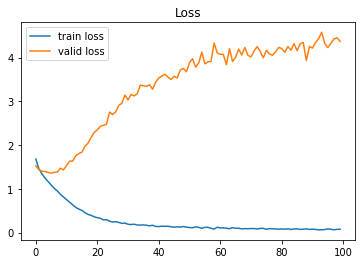

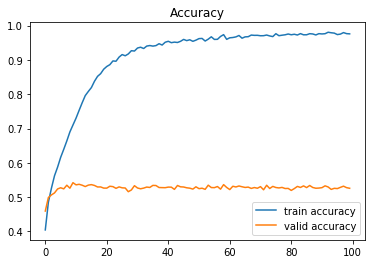

In [11]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()